# Homework 4: Can you predict the Midterm Elections?

Due: Monday, November 3, 2014 11:59 PM

<a href=https://raw.githubusercontent.com/cs109/2014/master/homework/HW4.ipynb download=HW4.ipynb> Download this assignment</a>

#### Submission Instructions
To submit your homework, create a folder named lastname_firstinitial_hw# and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. If we cannot access your work because these directions are not followed correctly, we will not grade your work. For the competition (problem 4), we will post a link on Piazza to a Google Form for you to submit your predictions. 


---


## Introduction

**Add Introduction**

You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a final prediction of the result of each state.

#### Data

We will use the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Problem 1: Data Wrangling

We will read in the polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) and create a dictionary of DataFrames as well a master table information for each race.

#### Problem 1(a)

Read in [this JSON object](http://elections.huffingtonpost.com/pollster/api/charts/?topic=2014-senate) containing the polls for the 2014 Senate Elections using the HuffPost API. Call this JSON object `info`.  This JSON object is imported as a list in Python where each element contains the information for one race.  Use the function `type` to confirm the that `info` is a list. 

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import seaborn as sns 

In [180]:
def get_polls(year):
    senate_elections_url = 'https://elections.huffingtonpost.com/pollster/api/charts/?topic={}-senate'.format(year)
    return requests.get(senate_elections_url).json()


polls = get_polls(2014)

In [181]:
type(polls)

list

#### Problem 1(b)

For each element of the list in `info` extract the state. We should have one poll per state, but we do not. Why?

**Hint**: Use the internet to find out information on the races in each state that has more than one entry. Eliminate entries of the list that represent races that are not happening.

In [3]:
from collections import Counter
import json

def count_states(polls):
    states = [poll['state'] for poll in polls]
    return Counter(states)

states_counter = count_states(polls)
for poll in polls:
    state = poll['state']
    if states_counter[state] > 1:
        print(json.dumps(poll, indent=4))

{
    "last_updated": "2016-06-06T14:37:56.000Z", 
    "title": "2014 Oklahoma Senate: Lankford vs. Johnson", 
    "url": "https://elections.huffingtonpost.com/pollster/2014-oklahoma-senate-lankford-vs-johnson", 
    "election_date": "2014-11-04", 
    "estimates": [
        {
            "first_name": "James", 
            "last_name": "Lankford", 
            "value": 62.4, 
            "choice": "Lankford", 
            "incumbent": false, 
            "party": "Rep", 
            "lead_confidence": 100.0
        }, 
        {
            "first_name": "Connie", 
            "last_name": "Johnson", 
            "value": 28.6, 
            "choice": "Johnson", 
            "incumbent": false, 
            "party": "Dem", 
            "lead_confidence": 0.0
        }, 
        {
            "first_name": null, 
            "last_name": null, 
            "value": 2.3, 
            "choice": "Other", 
            "incumbent": false, 
            "party": "N/A", 
            "lead_confi

In [4]:
from collections import Set

exclude_slugs = [
    '2014-new-hampshire-senate-bass-vs-shaheen'
]
exclude_slugs_set = set(exclude_slugs)
exclude_slugs_set
corrected_polls = [p for p in polls if p['slug'] not in exclude_slugs_set]
states_counter = count_states(corrected_polls)
states_counter.most_common()

[(u'OK', 2),
 (u'SC', 2),
 (u'DE', 1),
 (u'WV', 1),
 (u'HI', 1),
 (u'WY', 1),
 (u'NH', 1),
 (u'NJ', 1),
 (u'NM', 1),
 (u'TX', 1),
 (u'LA', 1),
 (u'NC', 1),
 (u'NE', 1),
 (u'TN', 1),
 (u'RI', 1),
 (u'VA', 1),
 (u'CO', 1),
 (u'AK', 1),
 (u'AR', 1),
 (u'IL', 1),
 (u'GA', 1),
 (u'IA', 1),
 (u'MA', 1),
 (u'ID', 1),
 (u'ME', 1),
 (u'MN', 1),
 (u'MI', 1),
 (u'KS', 1),
 (u'MT', 1),
 (u'MS', 1),
 (u'KY', 1),
 (u'OR', 1),
 (u'SD', 1)]

In [129]:
for poll in corrected_polls:
    if poll['slug'] == '2014-north-carolina-senate-tillis-vs-hagan':
        print json.dumps(poll, indent=4)

{
    "last_updated": "2016-07-08T16:29:46.000Z", 
    "title": "2014 North Carolina Senate: Tillis vs. Hagan", 
    "url": "https://elections.huffingtonpost.com/pollster/2014-north-carolina-senate-tillis-vs-hagan", 
    "election_date": "2014-11-04", 
    "estimates": [
        {
            "first_name": "Kay", 
            "last_name": "Hagan", 
            "value": 46.3, 
            "choice": "Hagan", 
            "incumbent": true, 
            "party": "Dem", 
            "lead_confidence": 69.7
        }, 
        {
            "first_name": "Thom", 
            "last_name": "Tillis", 
            "value": 45.7, 
            "choice": "Tillis", 
            "incumbent": false, 
            "party": "Rep", 
            "lead_confidence": 30.3
        }, 
        {
            "first_name": "Sean", 
            "last_name": "Haugh", 
            "value": 4.9, 
            "choice": "Haugh", 
            "incumbent": false, 
            "party": "Lib", 
            "lead_confidenc

There are 2 states where special elections were held concurrently with regular elections. In New Hampshire the actual candidates were Brown and Shaheen, so the other one is removed.

#### Problem 1(c)

Create a dictionary of pandas DataFrames called `polls` keyed by the name of the election (a string). Each value in the dictionary should contain the polls for one of the races.

In [185]:
def generate_polls_df(polls_json):
    slugs = [p['slug'] for p in polls_json]
    base_url = 'https://elections.huffingtonpost.com/pollster/'
    polls_dfs = {}
    for slug in slugs:
        poll_df = pd.read_csv(base_url + slug + '.csv')
        poll_df['Entry Date/Time (ET)'] = pd.to_datetime(poll_df['Entry Date/Time (ET)'])
        poll_df['Start Date'] = pd.to_datetime(poll_df['Start Date'])
        poll_df['End Date'] = pd.to_datetime(poll_df['End Date'])
        polls_dfs[slug] = poll_df
    return polls_dfs

polls_dfs = generate_polls_df(corrected_polls)

In [135]:
pdf = polls_dfs['2014-north-carolina-senate-tillis-vs-hagan']
pdf

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Haugh,Tillis,Hagan,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,PPP (D),2014-11-01,2014-11-03,2014-11-03 23:42:00,1333,Likely Voters,IVR/Online,5,44,46,6,https://elections.huffingtonpost.com/pollster/...,http://www.publicpolicypolling.com/pdf/2014/PP...,Pollster,Dem,NaN,1
1,YouGov,2014-10-25,2014-10-31,2014-11-01 11:21:31,1727,Likely Voters,Internet,NaN,41,44,12,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Civitas (R),2014-10-29,2014-10-30,2014-11-03 23:11:27,600,Likely Voters,Live Phone,7,41,42,6,https://elections.huffingtonpost.com/pollster/...,http://www.nccivitas.org/wp-content/uploads/20...,Pollster,Rep,NaN,1
3,Harper (R),2014-10-28,2014-10-30,2014-11-03 17:19:54,509,Likely Voters,Automated Phone,6,46,44,4,https://elections.huffingtonpost.com/pollster/...,http://www.harperpolling.com/polls/north-carol...,Sponsor,Rep,NaN,1
4,FOX,2014-10-28,2014-10-30,2014-10-31 22:12:35,909,Likely Voters,Live Phone,4,42,43,9,https://elections.huffingtonpost.com/pollster/...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None,NaN,1
5,CNN,2014-10-27,2014-10-30,2014-10-31 21:57:28,559,Likely Voters,Live Phone,4,46,48,2,https://elections.huffingtonpost.com/pollster/...,http://i2.cdn.turner.com/cnn/2014/images/10/31...,Nonpartisan,None,NaN,1
6,Rasmussen,2014-10-28,2014-10-29,2014-11-03 03:35:35,982,Likely Voters,IVR/Online,NaN,46,47,3,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
7,PPP (D-League of Conservation Voters),2014-10-28,2014-10-29,2014-10-30 18:31:40,657,Likely Voters,Automated Phone,4,46,47,3,https://elections.huffingtonpost.com/pollster/...,http://www.lcv.org/assets/pdf/nc-senate-poll-1...,Sponsor,Dem,NaN,1
8,POS (R-Tillis/NRSC),2014-10-26,2014-10-27,2014-10-31 02:20:00,600,Likely Voters,Live Phone,7,44,44,5,https://elections.huffingtonpost.com/pollster/...,http://images.politico.com/global/2014/10/28/n...,Sponsor,Rep,NaN,1
9,Vox Populi (R),2014-10-26,2014-10-27,2014-10-30 20:42:35,615,Likely Voters,IVR/Online,NaN,48,43,9,https://elections.huffingtonpost.com/pollster/...,http://www.poppolling.com/useruploads/files/nc...,Pollster,Rep,NaN,1


#### Problem 1(d)

Now create a master table information containing information about each race. Create a pandas DataFrame called `candidates` with rows containing information about each race. The `candidates` DataFrame should have the following columns: 

1. `State` = the state where the race is being held
2. `R` = name of republican candidate
3. `D` = name of non-republican candidate (Democrate or Independent) 
4. `incumbent` = R, D or NA

**Hint**: You will need a considerable amount of data wrangling for this.

In [315]:
predefined_data = {
    '2014-rhode-island-senate-zaccaria-vs-reed': {
        'R': 'Zaccaria',
        'D': 'Reed',
        'incumbent': 'D',
        'diff':  -0.414
    }
}

def create_master_df(polls_json, predefined_data):
    master = pd.DataFrame(columns=['slug', 'State', 'R', 'D', 'incumbent'])
    for poll in polls_json:
        rep = None
        dem = None
        incumbent = 'NA'
        estimates = poll['estimates']
        if not estimates:
            pr_data = predefined_data[poll['slug']]
            row = {'slug': poll['slug'], 'State': poll['state'], 'R': pr_data['R'], 'D': pr_data['D'], 'incumbent': pr_data['incumbent']}
        else:
            for candidate in poll['estimates']:
                if candidate['last_name'] is None:
                    continue
                if rep is not None and dem is not None:
                    break
                last_names = candidate['last_name'].split()
                name = last_names[-1]
                if candidate['party'] == 'Rep':
                    rep = name
                    if candidate['incumbent']:
                        incumbent = 'R'
                elif candidate['party'] in ['Dem', 'ind', 'Ind']:
                    dem = name
                    if candidate['incumbent']:
                        incumbent = 'D'
            row = {'slug': poll['slug'], 'State': poll['state'], 'R': rep, 'D': dem, 'incumbent': incumbent}
        master = master.append(row, ignore_index=True)
    return master.set_index('slug')

master = create_master_df(corrected_polls, predefined_data)

In [9]:
for poll in polls:
    if poll['slug'] == '2014-georgia-senate-perdue-vs-nunn':
        print(json.dumps(poll, indent=4))

{
    "last_updated": "2016-07-08T16:29:13.000Z", 
    "title": "2014 Georgia Senate: Perdue vs. Nunn", 
    "url": "https://elections.huffingtonpost.com/pollster/2014-georgia-senate-perdue-vs-nunn", 
    "election_date": "2014-11-04", 
    "estimates": [
        {
            "first_name": "David", 
            "last_name": "Perdue", 
            "value": 47.4, 
            "choice": "Perdue", 
            "incumbent": false, 
            "party": "Rep", 
            "lead_confidence": 99.9
        }, 
        {
            "first_name": "Michelle", 
            "last_name": "Nunn", 
            "value": 43.4, 
            "choice": "Nunn", 
            "incumbent": false, 
            "party": "Dem", 
            "lead_confidence": 0.0
        }, 
        {
            "first_name": "Amanda", 
            "last_name": "Swafford", 
            "value": 3.7, 
            "choice": "Swafford", 
            "incumbent": false, 
            "party": "Lib", 
            "lead_confidence": 

## Problem 2: Confidence Intervals

Compute a 99% confidence interval for each state. 

#### Problem 2(a)

Assume you have $M$ polls with sample sizes $n_1, \dots, n_M$. If the polls are independent, what is the average of the variances of each poll if the true proportion is $p$?

$$\frac{pq}{M}\sum_{i=0}^{M}\frac{1}{n_{i}}$$

#### Problem 2(b)

Compute the square root of these values in Problem 2(a) for the republican candidates in each race. Then, compute the standard deviations of the observed poll results for each race. 

In [197]:
from datetime import timedelta

ELECTIONS_DATE_2014 = pd.to_datetime('2014-11-04')

def calculate_stds(master_df, poll_dfs, elections_date, days_from_election=None):
    stds_df = pd.DataFrame(columns=['slug', 'th_std', 'r_std', 'n_polls'])
    for slug, poll_df in poll_dfs.items():
        if days_from_election:
            from_date = elections_date - timedelta(days=days_from_election)
            poll_df = poll_df[poll_df['End Date'] > from_date]
        rep_name = master_df.loc[slug]['R']
        ns = poll_df['Number of Observations']
        p_fracs = poll_df[rep_name] / 100.0
        p = np.mean(p_fracs)
        q = 1 - p
        M = len(ns)
        th_var = p * q / M * np.sum(np.ones(M) / ns)
        th_std = np.sqrt(th_var)
        real_std = np.std(p_fracs)
        stds_df = stds_df.append({'slug': slug, 'th_std': th_std, 'r_std': real_std, 'n_polls': M}, ignore_index=True)
    stds_df = stds_df.set_index('slug')
    return stds_df

stds_df = calculate_stds(master, polls_dfs, ELECTIONS_DATE_2014)
stds_df
    

,th_std,r_std,n_polls
slug,,,
2014-kentucky-senate-mcconnell-vs-grimes,0.017293,0.031345,57
2014-montana-senate-daines-vs-curtis,0.021161,0.027627,7
2014-north-carolina-senate-tillis-vs-hagan,0.018608,0.033725,76
2014-tennessee-senate-alexander-vs-ball,0.016249,0.030777,6
2014-michigan-senate-land-vs-peters,0.017751,0.032859,67
2014-alaska-senate-sullivan-vs-begich,0.019881,0.043013,35
2014-oregon-senate-wehby-vs-merkley,0.018291,0.038367,19
2014-new-hampshire-senate-brown-vs-shaheen,0.018646,0.040974,62
2014-mississippi-senate-cochran-vs-childers,0.018575,0.029554,8


#### Problem 2(c) 

Plot observed versus theoretical (average of the theoretical SDs) with the area of the point proportional to number of polls. How do these compare?

/Users/xardas/opt/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


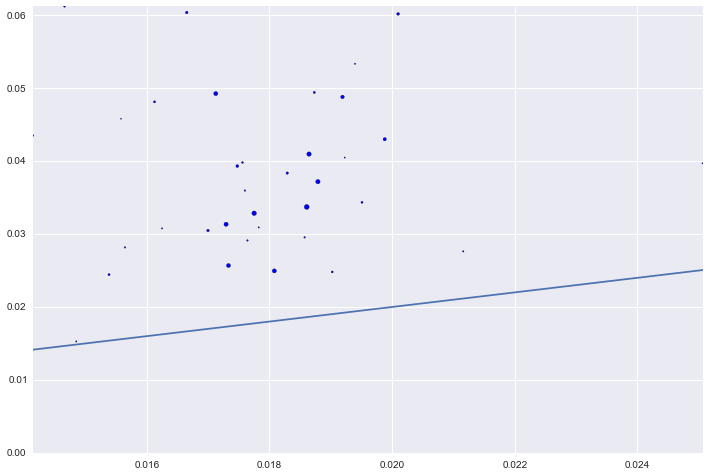

In [11]:
MIN_POINT_SIZE = 5

def plot_stds(df, marker='.', texts=None):    
    plt.figure(figsize=(12,8))
    ax = plt.subplot()
    x = np.arange(len(df))

    sizes = df['n_polls']
    multiplier = MIN_POINT_SIZE / np.min(sizes)
    ax.scatter(df['th_std'], df['r_std'], s = df['n_polls'] * multiplier, marker=marker)
    if texts is not None:
        for idx in range(len(df.index.values)):
            ax.text(df.iloc[idx]['th_std'], df.iloc[idx]['r_std'], texts[idx], fontdict={'fontsize': 14})
    y = x.copy()
    ax.plot(x, y)
    ax.set_xlim(np.min(df['th_std']), np.max(df['th_std']))
    ax.set_ylim(0, np.max(df['r_std']))
    
plot_stds(stds_df)

** Your answer here: **

#### Problem 2(d)

Repeat Problem 2(c) but include only the most recent polls from the last two months. Do they match better or worse or the same? Can we just trust the theoretical values?

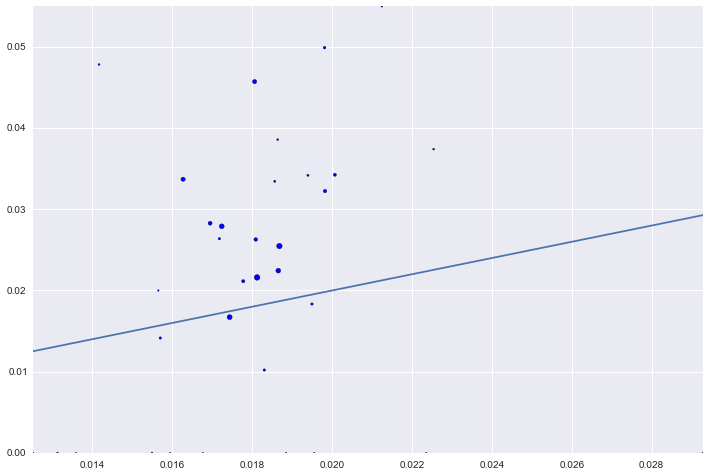

In [12]:
stds_df_limited = calculate_stds(master, polls_dfs, ELECTIONS_DATE_2014, 30)
plot_stds(stds_df_limited)

** Your answer here: **

#### Problem 2(e)

Create a scatter plot with each point representing one state. Is there one or more races that are outlier in that it they have much larger variabilities than expected ? Explore the original poll data and explain why the discrepancy?

True


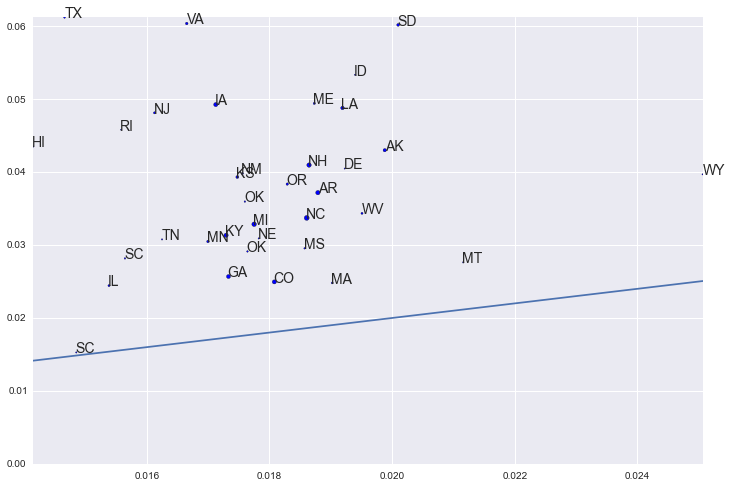

In [13]:
order = master.reindex(index=stds_df.index)
plot_stds(stds_df, texts=order['State'])
print np.all(stds_df.index == order.index)

** Your answer here: **

#### Problem 2(f)

Construct confidence intervals for the difference in each race. Use either theoretical or data driven estimates of the standard error depending on your answer to this question. Use the results in Problem 2(e), to justify your choice.


In [334]:
from scipy.stats import norm



def calculate_diffs(master_df, poll_dfs, elections_date, days_from_election=None, affiliation=None, min_polls=None, min_std=True, conf_interval=0.99):
    diffs_df = pd.DataFrame(columns=['slug', 'diff_mean', 'diff_std', 'lower', 'upper', 'n_polls'])
    for slug, poll_df in poll_dfs.items():
        filtered_df = poll_df
        if affiliation:
            filtered_df = poll_df[poll_df['Affiliation'] == affiliation]
        latest_poll_df = filtered_df
        if days_from_election:
            from_date = elections_date - timedelta(days=days_from_election)
            latest_poll_df = filtered_df[poll_df['End Date'] > from_date]
            if min_polls and latest_poll_df.shape[0] < min_polls:
                latest_poll_df = filtered_df.sort_values(by='End Date', ascending=False)
                latest_poll_df = latest_poll_df[:min_polls]
        rep_name = master_df.loc[slug]['R']
        dem_name = master_df.loc[slug]['D']
        ns = latest_poll_df['Number of Observations']
        M = latest_poll_df.shape[0]
        diffs = (latest_poll_df[rep_name] - latest_poll_df[dem_name]) / 100.0
        diff = np.mean(diffs)
        if min_std:
            std = np.std(diffs) / np.sqrt(M)
        else:
            std = np.std(diffs)
        
        nd = norm(loc=diff, scale=std)
        conf = nd.interval(conf_interval)
        diffs_df = diffs_df.append({'slug': slug, 'diff_mean': diff, 'diff_std': std, 'lower': conf[0], 'upper': conf[1], 'n_polls': M}, ignore_index=True)
    diffs_df = diffs_df.set_index('slug')
    return diffs_df

diffs = calculate_diffs(master, polls_dfs, ELECTIONS_DATE_2014, days_from_election=30, min_polls=4)


In [141]:
diffs

,diff_mean,diff_std,lower,upper,n_polls
slug,,,,,
2014-kentucky-senate-mcconnell-vs-grimes,0.056364,0.007527,0.036976,0.075751,11
2014-montana-senate-daines-vs-curtis,0.172500,0.012930,0.139194,0.205806,4
2014-north-carolina-senate-tillis-vs-hagan,-0.009600,0.004471,-0.021118,0.001918,25
2014-tennessee-senate-alexander-vs-ball,0.182500,0.016346,0.140396,0.224604,4
2014-michigan-senate-land-vs-peters,-0.114000,0.009180,-0.137645,-0.090355,15
2014-alaska-senate-sullivan-vs-begich,0.011000,0.015585,-0.029145,0.051145,10
2014-oregon-senate-wehby-vs-merkley,-0.182500,0.018498,-0.230148,-0.134852,4
2014-new-hampshire-senate-brown-vs-shaheen,-0.021053,0.006858,-0.038718,-0.003387,19
2014-mississippi-senate-cochran-vs-childers,0.155000,0.020156,0.103083,0.206917,4


In [142]:
print diffs['diff_mean'].mean(), diffs['diff_mean'].max()

0.04511608452533263 0.4475


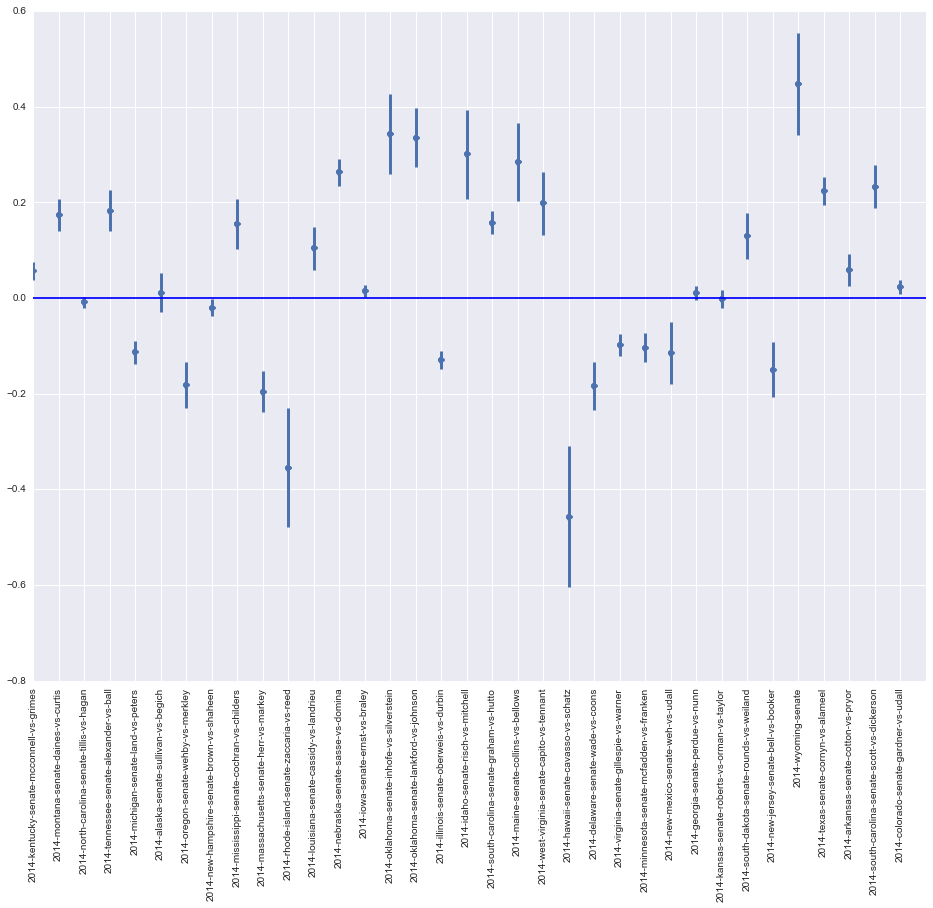

In [143]:
errors = np.abs((diffs['upper'] - diffs['lower']) / 2)

plt.figure(figsize=(16,12))
plt.errorbar(np.arange(len(diffs.index.values)), diffs['diff_mean'], yerr=errors, fmt='o', elinewidth=3)
plt.xticks(np.arange(len(diffs.index.values)), diffs.index.values, rotation=90)
plt.axhline(0)


# Problem 3: Prediction and Posterior Probabilities

Perform a Bayesian analysis to predict the probability of Republicans winning in each state then provide a posterior distribution of the number of republicans in the senate.

#### Problem 3(a)

First, we define a Bayesian model for each race. The prior for the difference $\theta$ between republicans and democtrats will be $N(\mu,\tau^2)$. Say before seeing poll data you have no idea who is going to win, what should $\mu$ be? How about $\tau$, should it be large or small? 

As we can see in previous data the diff is close to zero, so let's assume $\mu=0$. We're not quite sure about diff variety, so let's start with $\tau=0.05$ so that 45% diff lies in 99% confidence interval.

#### Problem 3(b)

What is the distribution of $d$ conditioned on $\theta$. What is the posterior distribution of $\theta | d$? 

**Hint**: Use normal approximation. 

We'll assume  that $d|\tau$ is normal.
Posterior distribution $\tau|d$ is conjugate of normal:
$$  p( \mu |  y_1, \ldots, y_n, \sigma^2) \propto \exp \left\{ -\frac{a}{2} (\mu-b/a)^2 \right\} $$

#### Problem 3(c)

The prior represents what we think before hand. We do not know who is expected to win, so we assume $\mu=0$. For this problem estimate $\tau$ using the observed differences across states (Hint: $\tau$ represents the standard deviation of a typical difference). Compute the posterior mean for each state and plot it against original average. Is there much change? Why or why not? 

In [144]:
def calculate_post(row):
    diff_mean = row['diff_mean']
    diff_std = row['diff_std']
    k = (diff_std ** 2) / 0.05 ** 2
    n = row['n_polls']
    mean_post = (n * diff_mean) / (k + n)
    std_post = np.sqrt(1 / (1 / (0.05 ** 2) + 1 / (diff_std ** 2)))
    return pd.Series({'mean_post': mean_post, 'std_post': std_post})
    

diffs_post = diffs.copy()
res = diffs_post.apply(calculate_post, axis=1)
diffs_post = diffs_post.join(res)
diffs_post

,diff_mean,diff_std,lower,upper,n_polls,mean_post,std_post
slug,,,,,,,
2014-kentucky-senate-mcconnell-vs-grimes,0.056364,0.007527,0.036976,0.075751,11,0.056248,0.007443
2014-montana-senate-daines-vs-curtis,0.172500,0.012930,0.139194,0.205806,4,0.169663,0.012518
2014-north-carolina-senate-tillis-vs-hagan,-0.009600,0.004471,-0.021118,0.001918,25,-0.009597,0.004454
2014-tennessee-senate-alexander-vs-ball,0.182500,0.016346,0.140396,0.224604,4,0.177751,0.015537
2014-michigan-senate-land-vs-peters,-0.114000,0.009180,-0.137645,-0.090355,15,-0.113744,0.009029
2014-alaska-senate-sullivan-vs-begich,0.011000,0.015585,-0.029145,0.051145,10,0.010894,0.014879
2014-oregon-senate-wehby-vs-merkley,-0.182500,0.018498,-0.230148,-0.134852,4,-0.176462,0.017349
2014-new-hampshire-senate-brown-vs-shaheen,-0.021053,0.006858,-0.038718,-0.003387,19,-0.021032,0.006794
2014-mississippi-senate-cochran-vs-childers,0.155000,0.020156,0.103083,0.206917,4,0.148949,0.018694


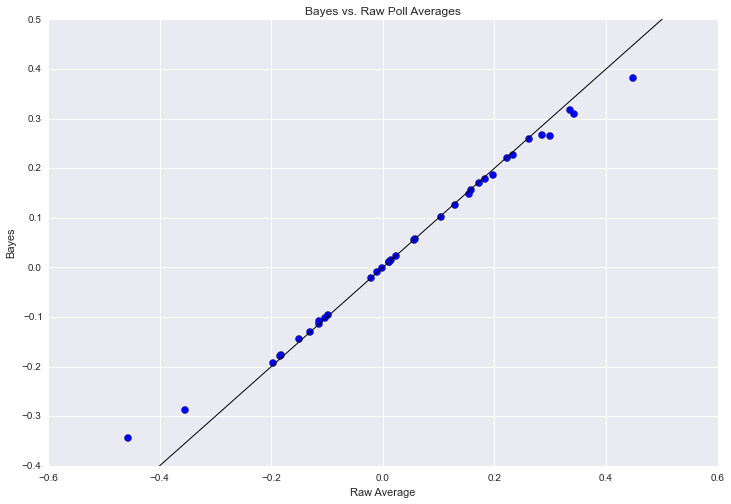

In [145]:
plt.figure(figsize=(12,8))
plt.scatter(diffs_post['diff_mean'], diffs_post['mean_post'], s=50)
plt.title("Bayes vs. Raw Poll Averages")
plt.xlabel("Raw Average")
plt.ylabel("Bayes")

currentx = plt.xlim()
currenty = plt.ylim()
plt.plot((-1,1),(-1,1), c='black', linewidth=1)
plt.xlim(currentx)
plt.ylim(currenty)
plt.show()

We get more change in posterior for polls that have not some much observed data. Those are slightly shifeted towards prior, e.g. Rhode Island. Diffs for polls with lots of data are almost equal to observed data.

#### Problem 3(d)

For each state, report a probabilty of Republicans winning. How does your answer here compare to the other aggregators?

In [365]:
def calculate_porbabilities(diffs_df, mean_col_name='diff_mean', std_col_name='diff_std'):
    diffs_post_prob = diffs_df.copy()
    diffs_post_prob['prob'] = np.around(1 - norm(loc=diffs_df[mean_col_name], scale=diffs_df[std_col_name]).cdf(0), 2)
    return diffs_post_prob.sort_values(by='prob')

diffs_post_prob = calculate_porbabilities(diffs_post, 'mean_post', 'std_post')

There are only some states with uncertainty: Colorado, Kansas, Iowa and Alaska. For other states prediction is quite certain. But the prediction is too sure about some states, e.g. it's totally wrong for North Carolina.

#### Problem 3(e)

Use the posterior distributions in a Monte Carlo simulation to generate election results. In each simulation compute the total number of seats the Republican control. Show a histogram of these results.

(array([19, 20, 21, 22, 23], dtype=int8),
 array([  36, 1424, 5319, 3177,   44]))

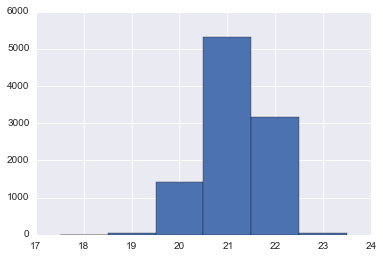

In [300]:
N_SIMULATIONS = 10000

def count_seats(df, mean_col_name, std_col_name):
    n_states = df.shape[0]
    rep_seats = np.zeros(N_SIMULATIONS, dtype=np.int8)
    for i in range(N_SIMULATIONS):
        results = np.random.normal(df[mean_col_name], df[std_col_name])
        rep_seats[i] = np.sum(results > 0)
    return rep_seats

rep_seats = count_seats(diffs_post_prob, 'mean_post', 'std_post')
plt.hist(rep_seats, bins=np.arange(min(rep_seats) - 1, max(rep_seats) + 2) - 0.5)
np.unique(rep_seats, return_counts=True)

## Problem 4

Predict the results for the 2014 Midterm Elections. We will have a three competitions with the terms for scoring entries described above. For both questions below, **explain** or provide commentary on how you arrived at your predictions including code. 

**Hint**: Use election results from 2010, 2012 to build and test models.

#### Problem 4(a)

Predict the number of Republican senators. You may provide an interval. Smallest interval that includes the election day result wins. 

**Note**: we want the total so add the numbers of those that are not up for election.

First, let's try to analyze 2012 elections data.

In [217]:
polls_2012 = get_polls(2012)

In [218]:
exclude_slugs_2012 = [
    '2012-florida-senate-primary'
]
exclude_slugs_2012_set = set(exclude_slugs_2012)
corrected_polls_2012 = [p for p in polls_2012 if p['slug'] not in exclude_slugs_2012_set]
corrected_polls_2012

[{u'election_date': u'2012-11-06',
  u'estimates': [],
  u'id': 341,
  u'last_updated': u'2016-06-06T14:40:25.000Z',
  u'poll_count': 2,
  u'short_title': u'UT Senate: Hatch vs. Howell',
  u'slug': u'2012-utah-senate-hatch-vs-howell',
  u'state': u'UT',
  u'title': u'2012 Utah Senate: Hatch vs. Howell',
  u'topic': u'2012-senate',
  u'url': u'https://elections.huffingtonpost.com/pollster/2012-utah-senate-hatch-vs-howell'},
 {u'election_date': u'2012-11-06',
  u'estimates': [],
  u'id': 307,
  u'last_updated': u'2016-06-06T14:40:40.000Z',
  u'poll_count': 4,
  u'short_title': u'Tennessee Senate: Corker vs. Clayton',
  u'slug': u'2012-tennessee-senate-corker-vs-clayton',
  u'state': u'TN',
  u'title': u'2012 Tennessee Senate: Corker vs. Clayton',
  u'topic': u'2012-senate',
  u'url': u'https://elections.huffingtonpost.com/pollster/2012-tennessee-senate-corker-vs-clayton'},
 {u'election_date': u'2012-11-06',
  u'estimates': [{u'choice': u'Cardin',
    u'first_name': u'Ben',
    u'incumben

In [214]:
len(corrected_polls_2012)

29

In [219]:
polls_dfs_2012 = generate_polls_df(corrected_polls_2012)

In [361]:
# missing data for master table
predefined_data_2012 = {
    '2012-utah-senate-hatch-vs-howell': {
        'R': 'Hatch',
        'D': 'Howell',
        'incumbent': 'R'
    },
    '2012-tennessee-senate-corker-vs-clayton': {
        'R': 'Corker',
        'D': 'Clayton',
        'incumbent': 'R'
    }
}

master_2012 = create_master_df(corrected_polls_2012, predefined_data_2012)

In [362]:
ELECTIONS_DATE_2012 = pd.to_datetime('2012-11-06')

stds_2012_df = calculate_stds(master_2012, polls_dfs_2012, ELECTIONS_DATE_2012)


In [226]:
diffs_2012 = calculate_diffs(master_2012, polls_dfs_2012, ELECTIONS_DATE_2012, days_from_election=30, min_polls=4)
diffs_2012

,diff_mean,diff_std,lower,upper,n_polls
slug,,,,,
2012-connecticut-senate-mcmahon-vs-murphy,-0.041538,0.006953,-0.059447,-0.023630,13
2012-california-senate-emken-vs-feinstein,-0.195000,0.010000,-0.220758,-0.169242,8
2012-massachusetts-senate-brown-vs-warren,-0.040667,0.008190,-0.061764,-0.019570,15
2012-missouri-senate-mccaskill-vs-akin,-0.074167,0.015611,-0.114377,-0.033956,12
2012-maine-senate-summers-vs-dunlap-vs-king,-0.175000,0.024875,-0.239073,-0.110927,4
2012-utah-senate-hatch-vs-howell,0.380000,0.007071,0.361786,0.398214,2
2012-washington-senate-baumgartner-vs-cantwell,-0.201667,0.017227,-0.246040,-0.157294,6
2012-minnesota-senate-bills-vs-klobuchar,-0.291111,0.018754,-0.339418,-0.242804,9
2012-new-mexico-senate-heinrich-vs-wilson,-0.065714,0.018167,-0.112509,-0.018920,7


In [366]:
diffs_comp_prob_2012 = calculate_porbabilities(diffs_2012)
diffs_comp_prob_2012

,diff_mean,diff_std,lower,upper,n_polls,prob
slug,,,,,,
2012-connecticut-senate-mcmahon-vs-murphy,-0.041538,0.006953,-0.059447,-0.023630,13,0.00
2012-west-virginia-senate-manchin-vs-raese,-0.405000,0.036142,-0.498096,-0.311904,4,0.00
2012-maryland-senate-bongino-vs-cardin,-0.260000,0.015411,-0.299696,-0.220304,4,0.00
2012-ohio-senate-brown-vs-mandel,-0.050488,0.005332,-0.064222,-0.036754,41,0.00
2012-hawaii-senate-lingle-vs-hirono,-0.145000,0.032882,-0.229699,-0.060301,4,0.00
2012-wisconsin-senate-thompson-vs-baldwin,-0.016250,0.004670,-0.028279,-0.004221,24,0.00
2012-michigan-senate-hoekstra-vs-stabenow,-0.129231,0.010849,-0.157177,-0.101285,13,0.00
2012-pennsylvania-senate-smith-vs-casey,-0.052400,0.008566,-0.074464,-0.030336,25,0.00
2012-rhode-island-senate-hinckley-vs-whitehouse,-0.212500,0.040214,-0.316085,-0.108915,4,0.00


In [371]:
def calc_definite_winners_v1(master, polls_dfs, days_from_election, affiliation=None):
    diffs_df = calculate_diffs(master, polls_dfs, ELECTIONS_DATE_2014, affiliation=affiliation, days_from_election=days_from_election, min_polls=4, min_std=False)
    diffs_prob = calculate_porbabilities(diffs_df)
    definite_winners = diffs_prob[(diffs_prob['prob'] > 0.5)]
    definite_losers = diffs_prob[(diffs_prob['prob'] < 0.5)]
    undefinite = diffs_prob.drop(definite_winners.index)
    undefinite = undefinite.drop(definite_losers.index)
    return definite_winners, definite_losers, undefinite

w30_2012, l30_2012, u30_2012 = calc_definite_winners_v1(master_2012, polls_dfs_2012, 30)
w30_2012

,diff_mean,diff_std,lower,upper,n_polls,prob
slug,,,,,,
2012-arizona-senate-flake-vs-carmona,0.0350,0.043875,-0.078014,0.148014,4,0.79
2012-nevada-senate-heller-vs-berkley,0.0350,0.032016,-0.047467,0.117467,4,0.86
2012-nebraska-senate-fischer-vs-kerrey,0.0875,0.058470,-0.063109,0.238109,4,0.93
2012-texas-senate-cruz-vs-sadler,0.1925,0.046030,0.073935,0.311065,4,1.00
2012-tennessee-senate-corker-vs-clayton,0.2900,0.068191,0.114352,0.465648,4,1.00
2012-utah-senate-hatch-vs-howell,0.3800,0.010000,0.354242,0.405758,2,1.00


For 2012 data it's 100% accurate to just threshold on 50% probability of republican winning. But there's one undefined state - Montana. Let's try to be more accurate with it.

In [372]:
u30_2012

,diff_mean,diff_std,lower,upper,n_polls,prob
slug,,,,,,
2012-montana-senate-rehberg-vs-tester,0,0.023452,-0.060409,0.060409,4,0.5


In [374]:
def calc_definite_winners_v2(master, polls_dfs, days_from_election, affiliation=None):
    diffs_df = calculate_diffs(master, polls_dfs, ELECTIONS_DATE_2014, affiliation=affiliation, days_from_election=days_from_election, min_polls=4, min_std=False)
    diffs_prob = calculate_porbabilities(diffs_df)
    definite_winners = diffs_prob[(diffs_prob['prob'] >= 0.9) & (np.abs(diffs_prob['diff_mean']) >= 0.02)]
    definite_losers = diffs_prob[(diffs_prob['prob'] <= 0.1) & (np.abs(diffs_prob['diff_mean']) >= 0.02)]
    undefinite = diffs_prob.drop(definite_winners.index)
    undefinite = undefinite.drop(definite_losers.index)
    return definite_winners, definite_losers, undefinite

w7_2012, l7_2012, u7_2012 = calc_definite_winners(master_2012, polls_dfs_2012, 7, affiliation='None')
u7_2012

,diff_mean,diff_std,lower,upper,n_polls,prob
slug,,,,,,
2012-wisconsin-senate-thompson-vs-baldwin,-1.500000e-02,0.011180,-0.043799,0.013799,4,0.09
2012-indiana-senate-mourdock-vs-donnelly,-4.250000e-02,0.039607,-0.144522,0.059522,4,0.14
2012-montana-senate-rehberg-vs-tester,-8.673617e-19,0.023452,-0.060409,0.060409,4,0.50
2012-north-dakota-senate-berg-vs-heitkamp,1.000000e-02,0.027386,-0.060542,0.080542,4,0.64
2012-arizona-senate-flake-vs-carmona,3.750000e-02,0.044931,-0.078233,0.153233,4,0.80
2012-nebraska-senate-fischer-vs-kerrey,5.250000e-02,0.044931,-0.063233,0.168233,4,0.88


We didn't get more accurate data as there are not enough polls that are not affiliated by one of the parties: 30 days from elections polls count is almost the same as 7 days from elections. We even got more uncertain.
So let's try to estimate seats distribution with Monte-Carlo simulation. Notice that we don't have data for Wyoming and Mississippi, so just add them to final result.

In [380]:
rep_seats_certain_2012 = 37 + w7_2012.shape[0] + 2

def calculate_seats_distribution(seats_simulation, certain_seats_count):
    counts = np.unique(seats_simulation, return_counts=True)
    percentage = {}
    for i in range(len(counts[0])):
        percentage[certain_seats_count + counts[0][i]] = float(counts[1][i]) / np.sum(counts[1])
    return percentage

rep_seats_2012 = count_seats(u7_2012, 'diff_mean', 'diff_std')
percentage_2012 = calculate_seats_distribution(rep_seats_2012, 37 + w7_2012.shape[0] + 2)
percentage_2012

{43: 0.0024,
 44: 0.0515,
 45: 0.2268,
 46: 0.3927,
 47: 0.2717,
 48: 0.052,
 49: 0.0029}

With 90% accuracy it can be stated that republicans get from 45 to 47 seats in 2012.
With 40% accuracy it's going to be 46 seats.
The result was 45 seats which falls in the first interval.

Now let's try the same algorithm for 2014 elections.

In [363]:
diffs_comp = calculate_diffs(master, polls_dfs, ELECTIONS_DATE_2014, days_from_election=30, min_polls=4, min_std=False)

In [384]:
diffs_comp_prob = calculate_porbabilities(diffs_comp)

In [383]:
w30, l30, u30 = calc_definite_winners_v2(master, polls_dfs, 30)
w7, l7, u7 = calc_definite_winners_v2(master, polls_dfs, 7, affiliation='None')

rep_seats_2014 = count_seats(u7, 'diff_mean', 'diff_std')
percentage_2014 = calculate_seats_distribution(rep_seats_2014, 30 + w7.shape[0])
percentage_2014

{50: 0.0803, 51: 0.3758, 52: 0.4278, 53: 0.1144, 54: 0.0017}

With 90% guarantee the range is 51-53 senators for republicans.
Most likely it's going to be 51-52 seats, but in fact the result was 53 seats which narrowly falls in the first interval.

#### Problem 4(b)

Predict the R-D difference in each state. The predictions that minimize the residual sum of squares between predicted and observed differences wins.

Again let's start with 2012 elections.

In [414]:
real_diffs_2012 = {
    "2012-connecticut-senate-mcmahon-vs-murphy": -0.118, 
    "2012-california-senate-emken-vs-feinstein": -0.25, 
    "2012-massachusetts-senate-brown-vs-warren": -0.075, 
    "2012-missouri-senate-mccaskill-vs-akin": -0.155, 
    "2012-maine-senate-summers-vs-dunlap-vs-king": -0.222, 
    "2012-utah-senate-hatch-vs-howell": 0.351, 
    "2012-washington-senate-baumgartner-vs-cantwell": -0.209, 
    "2012-minnesota-senate-bills-vs-klobuchar": -0.348, 
    "2012-new-mexico-senate-heinrich-vs-wilson": -0.058, 
    "2012-nebraska-senate-fischer-vs-kerrey": 0.156, 
    "2012-north-dakota-senate-berg-vs-heitkamp": -0.009,
    "2012-tennessee-senate-corker-vs-clayton": 0.345, 
    "2012-montana-senate-rehberg-vs-tester": -0.037, 
    "2012-virginia-senate-allen-vs-kaine": -0.059, 
    "2012-new-york-senate-long-vs-gillibrand": -0.459, 
    "2012-florida-senate-mack-vs-nelson": -0.13, 
    "2012-texas-senate-cruz-vs-sadler": 0.158, 
    "2012-new-jersey-senate-kyrillos-vs-menendez": -0.195, 
    "2012-rhode-island-senate-hinckley-vs-whitehouse": -0.299, 
    "2012-arizona-senate-flake-vs-carmona": 0.0303, 
    "2012-pennsylvania-senate-smith-vs-casey": -0.091, 
    "2012-michigan-senate-hoekstra-vs-stabenow": -0.208, 
    "2012-wisconsin-senate-thompson-vs-baldwin": -0.056, 
    "2012-hawaii-senate-lingle-vs-hirono": -0.252, 
    "2012-ohio-senate-brown-vs-mandel": -0.06, 
    "2012-maryland-senate-bongino-vs-cardin": -0.288, 
    "2012-west-virginia-senate-manchin-vs-raese": -0.24, 
    "2012-indiana-senate-mourdock-vs-donnelly": -0.0058, 
    "2012-nevada-senate-heller-vs-berkley": 0.0096
}

rd_diff_2012 = calculate_diffs(master_2012, polls_dfs_2012, ELECTIONS_DATE_2012, days_from_election=30, min_polls=4, min_std=False, conf_interval=0.999)
rd_diff_2012


,diff_mean,diff_std,lower,upper,n_polls
slug,,,,,
2012-connecticut-senate-mcmahon-vs-murphy,-0.041538,0.025068,-0.124025,0.040948,13
2012-california-senate-emken-vs-feinstein,-0.195000,0.028284,-0.288070,-0.101930,8
2012-massachusetts-senate-brown-vs-warren,-0.040667,0.031721,-0.145045,0.063712,15
2012-missouri-senate-mccaskill-vs-akin,-0.074167,0.054077,-0.252108,0.103775,12
2012-maine-senate-summers-vs-dunlap-vs-king,-0.175000,0.049749,-0.338702,-0.011298,4
2012-utah-senate-hatch-vs-howell,0.380000,0.010000,0.347095,0.412905,2
2012-washington-senate-baumgartner-vs-cantwell,-0.201667,0.042197,-0.340516,-0.062818,6
2012-minnesota-senate-bills-vs-klobuchar,-0.291111,0.056262,-0.476243,-0.105979,9
2012-new-mexico-senate-heinrich-vs-wilson,-0.065714,0.048065,-0.223872,0.092444,7


In [420]:
def calculate_diff_prediction_score(real_diffs, predicted_diffs):
    mse = 0
    wrong_results = 0
    wrong_intervals = 0
    sum_intervals = 0

    for slug, diff in real_diffs.iteritems():
        p_diff = predicted_diffs.loc[slug]['diff_mean']
        lower = predicted_diffs.loc[slug]['lower']
        upper = predicted_diffs.loc[slug]['upper']
        se = (diff * 100 - p_diff * 100) ** 2
        mse += se
        if diff * p_diff < 0:
            wrong_results += 1
            print slug, diff, lower, upper
        if diff < lower or diff > upper:
            wrong_intervals +=1
            print slug, diff, lower, upper
        sum_intervals += (upper - lower)
    mse /= len(real_diffs)

    return mse, sum_intervals, wrong_results, wrong_intervals

calculate_diff_prediction_score(real_diffs_2012, rd_diff_2012)

2012-north-dakota-senate-berg-vs-heitkamp -0.009 -0.14333390538954682 0.1633339053895483


(35.58232859218719, 8.278209648094926, 1, 0)

The following parameters for 2012 make best result: take polls not older than 30 days before elections, use 99.9% confidence interval.

In [421]:
rd_diff = calculate_diffs(master, polls_dfs, ELECTIONS_DATE_2014, days_from_election=30, min_polls=4, min_std=False, conf_interval=0.999)

real_diffs = {
    "2014-kentucky-senate-mcconnell-vs-grimes": 0.155, 
    "2014-montana-senate-daines-vs-curtis": 0.179, 
    "2014-north-carolina-senate-tillis-vs-hagan": 0.017, 
    "2014-tennessee-senate-alexander-vs-ball": 0.301, 
    "2014-michigan-senate-land-vs-peters": -0.132, 
    "2014-alaska-senate-sullivan-vs-begich": 0.032, 
    "2014-oregon-senate-wehby-vs-merkley": -0.185, 
    "2014-new-hampshire-senate-brown-vs-shaheen": -0.032, 
    "2014-mississippi-senate-cochran-vs-childers": 0.23, 
    "2014-massachusetts-senate-herr-vs-markey": -0.24, 
    "2014-rhode-island-senate-zaccaria-vs-reed": -0.414, 
    "2014-louisiana-senate-cassidy-vs-landrieu": -0.011, 
    "2014-nebraska-senate-sasse-vs-domina": 0.337, 
    "2014-iowa-senate-ernst-vs-braley": 0.085, 
    "2014-oklahoma-senate-inhofe-vs-silverstein": 0.395, 
    "2014-oklahoma-senate-lankford-vs-johnson": 0.389, 
    "2014-illinois-senate-oberweis-vs-durbin": -0.10, 
    "2014-idaho-senate-risch-vs-mitchell": 0.306, 
    "2014-south-carolina-senate-graham-vs-hutto": 0.156, 
    "2014-maine-senate-collins-vs-bellows": 0.368, 
    "2014-west-virginia-senate-capito-vs-tennant": 0.276, 
    "2014-hawaii-senate-cavasso-vs-schatz": -0.421, 
    "2014-delaware-senate-wade-vs-coons": -0.135, 
    "2014-virginia-senate-gillespie-vs-warner": -0.008, 
    "2014-minnesota-senate-mcfadden-vs-franken": -0.103, 
    "2014-new-mexico-senate-weh-vs-udall": -0.108, 
    "2014-georgia-senate-perdue-vs-nunn": 0.079, 
    "2014-kansas-senate-roberts-vs-orman-vs-taylor": 0.088, 
    "2014-south-dakota-senate-rounds-vs-weiland": 0.209, 
    "2014-new-jersey-senate-bell-vs-booker": -0.134, 
    "2014-wyoming-senate": 0.547, 
    "2014-texas-senate-cornyn-vs-alameel": 0.272, 
    "2014-arkansas-senate-cotton-vs-pryor": 0.17, 
    "2014-south-carolina-senate-scott-vs-dickerson": 0.241, 
    "2014-colorado-senate-gardner-vs-udall": 0.025
}

calculate_diff_prediction_score(real_diffs, rd_diff)


2014-north-carolina-senate-tillis-vs-hagan 0.017 -0.08316664104568088 0.06396664104568157
2014-nebraska-senate-sasse-vs-domina 0.337 0.19125800646740612 0.3337419935325946
2014-tennessee-senate-alexander-vs-ball 0.301 0.07492694879805727 0.2900730512019437
2014-louisiana-senate-cassidy-vs-landrieu -0.011 -0.12326482400052134 0.3299314906671902
2014-kansas-senate-roberts-vs-orman-vs-taylor 0.088 -0.08892815151648817 0.0858512284395659
2014-kansas-senate-roberts-vs-orman-vs-taylor 0.088 -0.08892815151648817 0.0858512284395659
2014-kentucky-senate-mcconnell-vs-grimes 0.155 -0.02577706580421614 0.13850433853148963
2014-iowa-senate-ernst-vs-braley 0.085 -0.05533570061500967 0.08333570061501032
2014-virginia-senate-gillespie-vs-warner -0.008 -0.156247652862891 -0.03875234713710846


(38.86738590169506, 9.909156701664992, 3, 6)

In [424]:
rd_diff

,diff_mean,diff_std,lower,upper,n_polls
slug,,,,,
2014-kentucky-senate-mcconnell-vs-grimes,0.056364,0.024963,-0.025777,0.138504,11
2014-montana-senate-daines-vs-curtis,0.172500,0.025860,0.087406,0.257594,4
2014-north-carolina-senate-tillis-vs-hagan,-0.009600,0.022357,-0.083167,0.063967,25
2014-tennessee-senate-alexander-vs-ball,0.182500,0.032692,0.074927,0.290073,4
2014-michigan-senate-land-vs-peters,-0.114000,0.035553,-0.230987,0.002987,15
2014-alaska-senate-sullivan-vs-begich,0.011000,0.049285,-0.151173,0.173173,10
2014-oregon-senate-wehby-vs-merkley,-0.182500,0.036997,-0.304238,-0.060762,4
2014-new-hampshire-senate-brown-vs-shaheen,-0.021053,0.029894,-0.119418,0.077313,19
2014-mississippi-senate-cochran-vs-childers,0.155000,0.040311,0.022355,0.287645,4


This gives errors for 6 states, 39 MSE and 9.90 intervals size which unfortunately eliminates me from competition.

**Provide an explanation of methodology here**:

#### Problem 4(c)

Report a confidence interval for the R-D difference in each state. If the election day result falls outside your confidence interval in more than two states you are eliminated. For those surviving this cutoff, we will add up the size of all confidence intervals and sum. The smallest total length of confidence interval wins. 

**Note**: you can use Bayesian credible intervals or whatever else you want. 

Done in 4(b)

**Provide an explanation of methodology here**:

# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code.  Compress the folder (please use .zip compression) and submit to the CS109 dropbox in the appropriate folder. *If we cannot access your work because these directions are not followed correctly, we will not grade your work.*
